# Project 4

### Aim

Using sea ice data from Kaggle showing total area for the north and south pole back to 1978, see how closely we can forecast  one from the other using Random Forest

In [1]:
# load in libraries

import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
# load the csv
ice = pd.read_csv('seaice.csv')

In [3]:
# check out the dataframe
ice.head(5)

,Year,Month,Day,North,South
0,1978,10,26,10.231,17.624
1,1978,10,28,10.420,17.803
2,1978,10,30,10.557,17.670
3,1978,11,1,10.670,17.527
4,1978,11,3,10.777,17.486


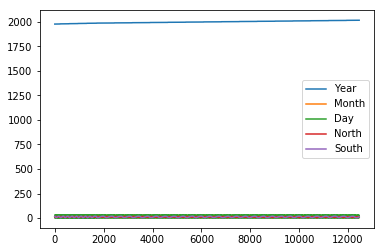

In [4]:
# plot the dataframe
ice.plot()

In [5]:
# because the dates are messed up we need to turn those three columns into a recognisable date
ice['date'] = ice['Year'].map(str) + "-" + ice["Month"].map(str) + "-" + ice["Day"].map(str)

# convert this new column into an actual date
ice['date'] = pd.to_datetime(ice['date'])

In [6]:
ice.head(5)

,Year,Month,Day,North,South,date
0,1978,10,26,10.231,17.624,1978-10-26
1,1978,10,28,10.420,17.803,1978-10-28
2,1978,10,30,10.557,17.670,1978-10-30
3,1978,11,1,10.670,17.527,1978-11-01
4,1978,11,3,10.777,17.486,1978-11-03


In [7]:
# drop the day column (we won't use it)
ice = ice.drop(columns = ['Day'])
ice.head(5)

,Year,Month,North,South,date
0,1978,10,10.231,17.624,1978-10-26
1,1978,10,10.420,17.803,1978-10-28
2,1978,10,10.557,17.670,1978-10-30
3,1978,11,10.670,17.527,1978-11-01
4,1978,11,10.777,17.486,1978-11-03


In [8]:
# shuffle the columns around, change the index to be the date, change year from an integer to a string
ice = ice[['date','North','South','Year','Month']]
ice['Year'] = ice['Year'].astype('str')
ice = ice.set_index('date')
ice.head(5)

,North,South,Year,Month
date,,,,
1978-10-26,10.231,17.624,1978,10
1978-10-28,10.420,17.803,1978,10
1978-10-30,10.557,17.670,1978,10
1978-11-01,10.670,17.527,1978,11
1978-11-03,10.777,17.486,1978,11


C:\Users\stuar\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


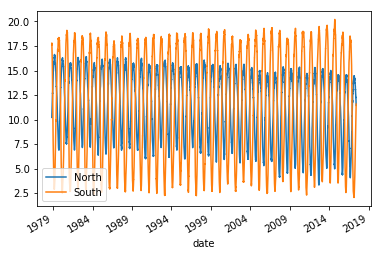

In [9]:
# plot the data just to see what it looks like
ice.plot.line(y=['North','South'])

C:\Users\stuar\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


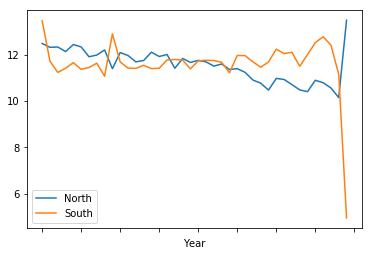

In [10]:
# hhmmm, maybe group by year and look at an average to see if there is a trend
ice_year = ice.groupby('Year').mean()
ice_month = ice.groupby('Month').mean()
ice_year.plot.line(y=['North','South'])

C:\Users\stuar\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


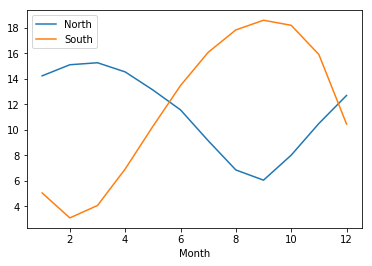

In [11]:
# not sure what's going on with those final years, let's have a look at by month
ice_month.plot.line(y=['North','South'])

In [12]:
# actually not what I was expecting but makes sense - seems to be inversely correlated

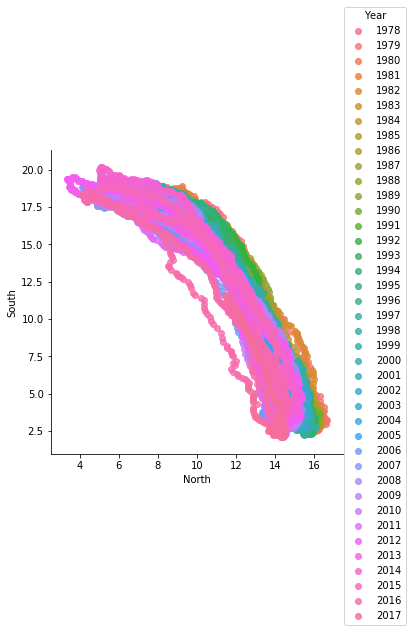

In [13]:
# let's try out a scatter
sb.lmplot( x='North', y='South', data=ice, fit_reg=False, hue='Year', legend=True)

In [14]:
# this looks cooler than I was expecting - i colored by year to see if the lower results were from earlier years
# and that does seem to be the case

In [15]:
# for decision trees we have to convert our dataframes into numpy arrays (apparently that's how it works)
# labels are the values we want to predict
labels = np.array(ice['South'])

# Remove the labels from the features
features = np.array(ice['North'])

# i had to change the shape because the model wouldn't work otherwise - this might be necessary when we only have 1 column?
features = features.reshape(-1, 1)
labels = labels.reshape(-1, 1)

In [16]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)


In [17]:
# checking that all the lengths are correct
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (9340, 1)
Training Labels Shape: (9340, 1)
Testing Features Shape: (3114, 1)
Testing Labels Shape: (3114, 1)


In [18]:
# Import random forest
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

C:\Users\stuar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [19]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'metres')

Mean Absolute Error: 6.35 metres


In [20]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 12.11 %.


In [21]:
# create a dataframe that has a column for predictions and one for actuals to see what the outcome looks like
results = pd.DataFrame(data=predictions)
results.columns = ['predictions']
results['actual'] = test_features
results.head(5)

,predictions,actual
0,3.441655,14.000
1,3.320499,16.248
2,18.286085,4.651
3,18.177041,7.661
4,3.427763,15.204


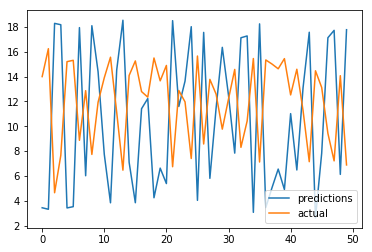

In [22]:
# plot the results only the top 50 so it can actually be viewed
results.head(50).plot()

## Wow the model is terrible and I'm not sure why... maybe because we've taken month out of the data?

In [23]:
# let's dummy up the months and try again but drop year first
ice = ice.drop(columns = 'Year')

In [24]:
# one-hot encode the data using pandas get_dummies
ice_dummies_month = pd.get_dummies(ice['Month'])
ice = pd.concat([ice,ice_dummies_month], axis=1)
ice.head(5)

,North,South,Month,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,,,,
1978-10-26,10.231,17.624,10,0,0,0,0,0,0,0,0,0,1,0,0
1978-10-28,10.420,17.803,10,0,0,0,0,0,0,0,0,0,1,0,0
1978-10-30,10.557,17.670,10,0,0,0,0,0,0,0,0,0,1,0,0
1978-11-01,10.670,17.527,11,0,0,0,0,0,0,0,0,0,0,1,0
1978-11-03,10.777,17.486,11,0,0,0,0,0,0,0,0,0,0,1,0


In [25]:
ice = ice.drop(columns = 'Month')

In [26]:
ice.shape

(12454, 14)

In [27]:
ice.head(5)

,North,South,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,,,
1978-10-26,10.231,17.624,0,0,0,0,0,0,0,0,0,1,0,0
1978-10-28,10.420,17.803,0,0,0,0,0,0,0,0,0,1,0,0
1978-10-30,10.557,17.670,0,0,0,0,0,0,0,0,0,1,0,0
1978-11-01,10.670,17.527,0,0,0,0,0,0,0,0,0,0,1,0
1978-11-03,10.777,17.486,0,0,0,0,0,0,0,0,0,0,1,0


In [12]:
# turn the dataframe into a numpy array and check the shape
labels = np.array(ice['South'])
ice = ice.drop(columns = 'South')
labels.shape

(12454,)

In [13]:
# Remove the labels from the features
features = np.array(ice)
features.shape

(12454, 3)

In [14]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [15]:
# checking that all the lengths are correct
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (9340, 3)
Training Labels Shape: (9340,)
Testing Features Shape: (3114, 3)
Testing Labels Shape: (3114,)


In [47]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [48]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'metres')

Mean Absolute Error: 0.71 metres


In [49]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 90.83 %.


In [50]:
# create a dataframe that has a column for predictions and one for actuals to see what the outcome looks like
results = pd.DataFrame(data=predictions)
results.columns = ['predictions']
results['actuals'] = test_labels

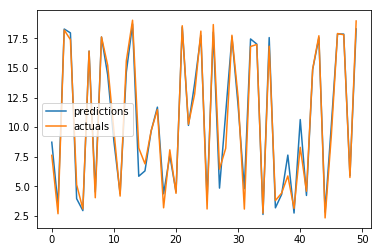

In [52]:
# plot the results only the top 50 so it can actually be viewed
results.head(50).plot()

In [ ]:
# pretty happy with that!